<img src="https://drive.google.com/uc?id=1DvKhAzLtk-Hilu7Le73WAOz2EBR5d41G" width="500"/>


---


# **Deep learning module introduction**

#### **Morning contents/agenda**

0. Start at the end

1. Description of the module's contents, materials and resources:
  - github repository
  - schedule and assessments
  - teaching team

2. Google Colab introduction

3. Deep learning?

4. Why `PyTorch`?

5. A simple feed-forward network (FNN) with `PyTorch`

#### **Learning outcomes**

1. Overview the module contents and how they will be delivered

2. Understand the assessment process for the module

3. First contact with `PyTorch` and FFNs

<br>


#### **Afternoon contents/agenda**

1. https://playground.tensorflow.org

2. Improving our simpleFFN

#### **Learning outcomes**

1. Understand the effect of different network configurations with tensorflow

2. Break the morning example and raise questions about how `PyTorch` works.

$$\\[2cm]$$

---
---

## 1. Tensorflow exercises

In [164]:
%%html
<iframe src="https://playground.tensorflow.org" width="1200" height="700"></iframe>


Unless otherwise indicated, we work with the following hyper-parameters:
Learning rate =0.03, Batch Size=10, Noise=0, Training Data=70%.

Since there is a total of 500 data points, there are 350 (or 70%) training data and 150 test data.

We examine the behaviour of the networks until about 3500 epochs.

It is important to note that there will be differences between different runs obtained with the same hyperparameters, because the initial values of the neural network parameters (weights and bias terms) are sampled randomly.

The dataset itself may also change if you click the Regenerate Button at the bottom left of the screen.

We work on a classification problem on the Spiral dataset. The yellow dots have a value of -1 and the blue dots have a value of +1.





#### **Question 1:**
Use the sigmoid activation function and no hidden layer. What do you observe? How do you interpret it?

#### **Question 2:**
Now put just one hidden layer, a sigmoid activation function, and make the number of neurons in the hidden layer equal to 4. Then make it equal to the maximum offered by the application, that is 8. What is the number of trained parameters and what do you observe in each case?

#### **Question 3:**
Now do the same as in question 2, but using the ReLU activation function. What do you observe?

#### **Question 4:**
Now use two hidden layers each with four neurons and the ReLU activation function. How many trained parameters do you have? What do you observe?

#### **Question 5:**
Now try two hidden layers with 8 neurons each and a ReLU activation function. How many trained parameters do you have? What do you observe?

#### **Question 6:**
Now try three hidden layers with 8 neurons each. What happens if you compare sigmoid and ReLU?

#### **Question 7:**
Now keep the three layers with 8 neurons and change the batch size to 30, and then 1. What happens if you use ReLU?


#### **Question 8:**
Now that we have obtained a good model see what happens if you introduce all the 7 input variables

#### **Question 9:**
Now assume that the data are affected by noise. Just use the maximum noise value of 50. The application is not very clear about the mechanism by which the noise affects the initial data classes. This does not matter, just assume that, after introducing this noise value of 50, you are now dealing with new binary class values at each point. What do you observe?

<br>

---

<br>

## 2. `simpleFFN` exercise

Try to improve the performance of the network we implemented this morning. A few ideas and hints:

- modify the simpleFFN class to add more layers
- play with the sizes of the layers
- **don't touch** the train, validation, and evaluate functions
- play with the data splits
- anything else you see fit

I recommend that you copy-paste the code from this morning here, and then play editing it.

In [165]:
!pip install pycm livelossplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['seed', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [166]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

from livelossplot import PlotLosses
from pycm import *

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchsummary import summary

def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  # uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. Useful when inputs do not change size -
    torch.backends.cudnn.enabled   = False

    return True
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

No GPU available!


In [167]:
# 实现一个前向传播网络（Feedforward Neural Network）
class simpleFFN(nn.Module):
    def __init__(self):
        super(simpleFFN, self).__init__()
        self.hidden_1 = nn.Linear(784,400,bias=True)
        self.hidden_2 = nn.Linear(400,200,bias=True)
        self.hidden_3 = nn.Linear(200,50,bias=True)
        self.output = nn.Linear(50,10,bias=False)
        self.activation = nn.Sigmoid()

    def forward(self, X):
        z1 = self.hidden_1(X)
        a1 = self.activation(z1)
        z2 = self.hidden_2(a1)
        a2 = self.activation(z2)
        z3 = self.hidden_3(z2)
        a3 = self.activation(z3)
        z4 = self.output(a3)
        a4 = self.activation(z4)
        return a4
x = torch.randn((1,1,784))
model = simpleFFN()
y = model(x)
print(y)
print(model)



tensor([[[0.5466, 0.5639, 0.4119, 0.6227, 0.5753, 0.5022, 0.5026, 0.5599,
          0.5325, 0.5310]]], grad_fn=<SigmoidBackward0>)
simpleFFN(
  (hidden_1): Linear(in_features=784, out_features=400, bias=True)
  (hidden_2): Linear(in_features=400, out_features=200, bias=True)
  (hidden_3): Linear(in_features=200, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=10, bias=False)
  (activation): Sigmoid()
)


In [168]:
# 加载数据集
mnist_train = MNIST('./', download=True, train=True)
mnist_test = MNIST('./', download=True, train=False)

In [169]:
# 分割数据集
shuffler = StratifiedShuffleSplit(n_splits=1 ,test_size=0.1, random_state=42)
# 这里总是蒙圈，但是不是有X_train, X_test, y_train, y_test吗
# 训练集是要分成X_train,y_train的，label就是y
shuffler = shuffler.split(mnist_train.train_data, mnist_train.train_labels)
indices = [(train_idx, validation_idx) for train_idx, validation_idx in shuffler][0]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [170]:
indices

(array([50700, 15345,  2527, ...,  4176, 14834, 39484]),
 array([58886, 22875, 48551, ..., 13829, 40340, 38131]))

In [171]:
mnist_train.train_data[indices[0]].shape

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([54000, 28, 28])

In [172]:
mnist_train.train_data.shape

torch.Size([60000, 28, 28])

In [173]:
# 标准化数据
def apply_standardization(X):
    X /= 255
    X -= 0.1307
    X /= 0.3081
    return X

In [174]:
X_train, y_train = apply_standardization(mnist_train.train_data[indices[0]].float()), mnist_train.train_labels[indices[0]]
X_val, y_val = apply_standardization(mnist_train.train_data[indices[1]].float()), mnist_train.train_labels[indices[1]]
X_test, y_test = apply_standardization(mnist_test.test_data.float()), mnist_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [175]:
# 打包数据
mnist_train = TensorDataset(X_train, y_train.long())
mnist_val = TensorDataset(X_val, y_val.long())
mnist_test = TensorDataset(X_test, y_test.long())


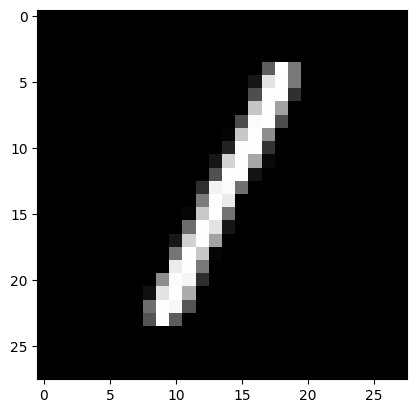

In [176]:
plt.imshow(X_train[1], cmap='gray')

In [177]:
# 训练模型的函数
def train(model, optimizer, criterion, data_loader):
    model.train()
    train_loss, train_accuracy = 0, 0
    for X, y in data_loader:
        X, y = X.to(device),y.to(device)
        optimizer.zero_grad()
        a2 = model(X.view(-1,28*28))
        loss = criterion(a2,y)
        loss.backward()
        train_loss += loss*X.size(0)
        y_pred = F.log_softmax(a2, dim=1).max(1)[1]
        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred.detach().cpu().numpy())*X.size(0)
        optimizer.step()
    return train_loss/len(data_loader.dataset), train_accuracy/len(data_loader.dataset)

def validate(model, criterion, data_loader):
    model.eval()
    validation_loss, validation_accuracy = 0, 0
    for X,y in data_loader:
        with torch.no_grad():
            X ,y = X.to(device),y.to(device)
            a2 = model(X.view(-1,28*28))
            loss = criterion(a2 ,y)
            validation_loss += loss*X.size(0)
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]
            validation_accuracy += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())*X.size(0)
    return validation_loss/len(data_loader.dataset), validation_accuracy/len(data_loader.dataset)


In [178]:
seed = 42
lr = 1e-2
momentum = 0.9
batch_size = 64
test_batch_size = 1000
n_epochs = 30

In [179]:
set_seed(seed)
model = simpleFFN().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion = nn.CrossEntropyLoss()

In [180]:
# 数据加载器，吧数据分块训练
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
validation_loader = DataLoader(mnist_val, batch_size=test_batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(mnist_test, batch_size=test_batch_size, shuffle=False, num_workers=0)


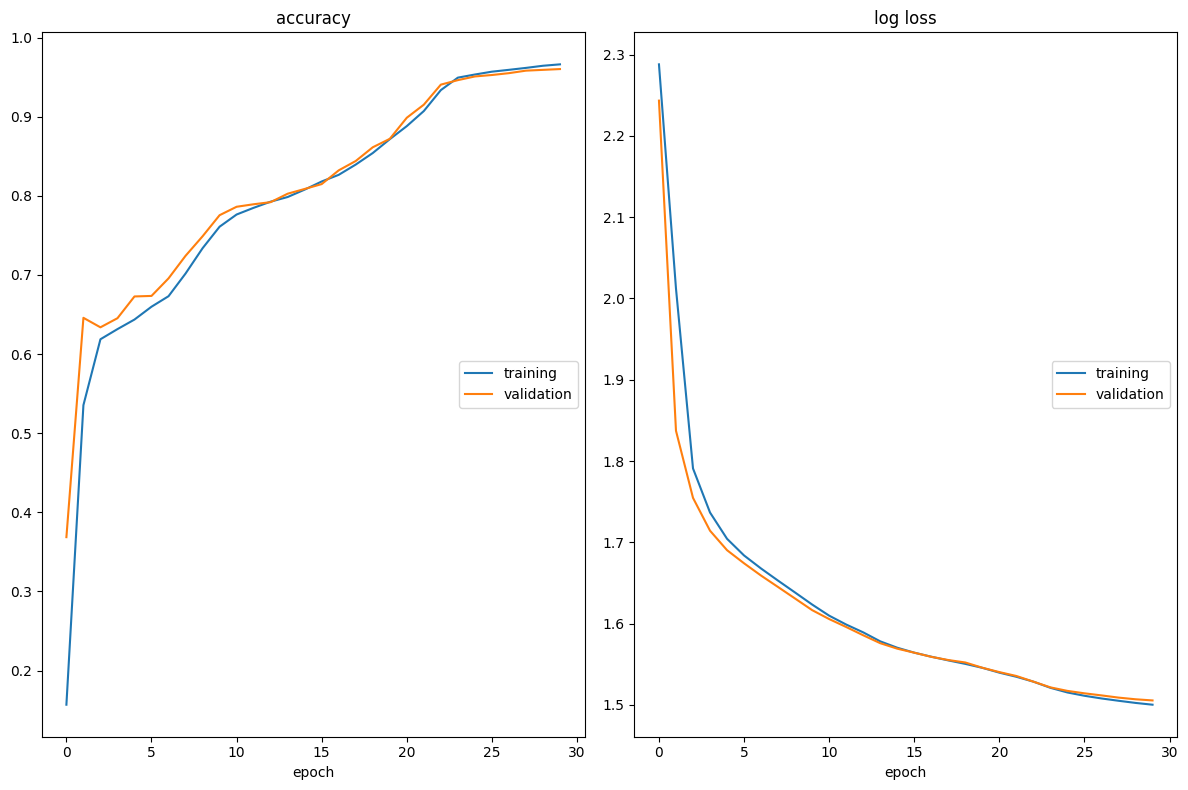

accuracy
	training         	 (min:    0.157, max:    0.966, cur:    0.966)
	validation       	 (min:    0.369, max:    0.960, cur:    0.960)
log loss
	training         	 (min:    1.500, max:    2.288, cur:    1.500)
	validation       	 (min:    1.505, max:    2.243, cur:    1.505)
1.50544011592865


In [181]:

# 训练
set_seed(seed)
liveloss = PlotLosses()    # plots evolution of loss and accuracy
for epoch in range(30):
    logs = {}
    train_loss, train_accuracy = train(model, optimizer, criterion, train_loader)

    logs['' + 'log loss'] = train_loss.item()
    logs['' + 'accuracy'] = train_accuracy.item()

    validation_loss, validation_accuracy = validate(model, criterion, validation_loader)
    logs['val_' + 'log loss'] = validation_loss.item()
    logs['val_' + 'accuracy'] = validation_accuracy.item()

    liveloss.update(logs)
    liveloss.draw()
    print(validation_loss.item())